<a href="https://colab.research.google.com/github/Arnavvv16/AI_Notes/blob/main/KTS_25_26_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression from Scratch!

In this section we will create a simple dataset, create all logistic regression functions from scratch and train our model on the created dataset. We're creating a voter database and our model will predict whether an individual can vote or not.

1. Imports, Create dataset, Visualize

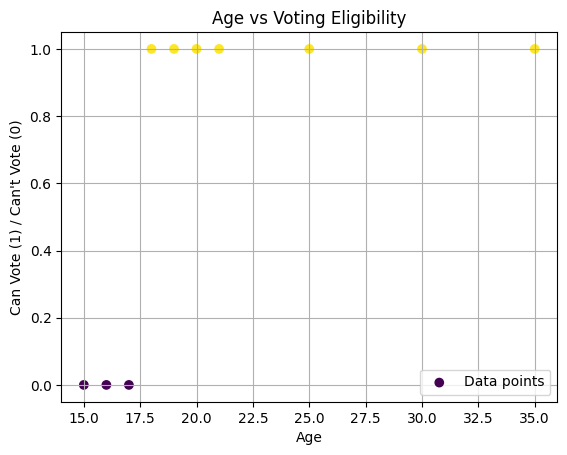

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ages of individuals
X = np.array([15, 16, 17, 18, 19, 20, 21, 25, 30, 35])

# Voting eligibility: 0 = Can't vote, 1 = Can vote (assuming legal age is 18)
y = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])


plt.scatter(X, y, c=y.ravel(), label='Data points')
plt.xlabel("Age")
plt.ylabel("Can Vote (1) / Can't Vote (0)")
plt.title("Age vs Voting Eligibility")
plt.grid(True)
plt.legend()
plt.show()

2. Sigmoid Function:

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

3. Model training:
We use binary cross entropy loss.
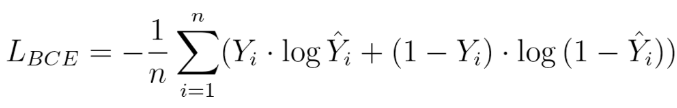

In [ ]:
# Initialize weights and bias
w = 0.0
b = 0.0

def train(X, y, lr=0.01, epochs=1000):
    global w, b
    m = len(X)

    for epoch in range(epochs):
        z = w * X + b
        y_pred = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot((y_pred - y), X)
        db = (1/m) * np.sum(y_pred - y)

        # Update weights
        w -= lr * dw
        b -= lr * db

        # Print loss occasionally
        if epoch % 200 == 0:
            loss = -(1/m) * np.sum(y*np.log(y_pred) + (1 - y)*np.log(1 - y_pred))
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

train(X, y, lr=0.05, epochs=4000)
print(f"Final weights -> w: {w:.4f}, b: {b:.4f}")

Epoch 0, Loss: 0.6931
Epoch 200, Loss: 0.8175
Epoch 400, Loss: 0.5149
Epoch 600, Loss: 1.7325
Epoch 800, Loss: 0.4988
Epoch 1000, Loss: 0.5337
Epoch 1200, Loss: 1.0240
Epoch 1400, Loss: 0.4880
Epoch 1600, Loss: 0.3870
Epoch 1800, Loss: 0.3888
Epoch 2000, Loss: 0.3992
Epoch 2200, Loss: 0.4193
Epoch 2400, Loss: 0.4410
Epoch 2600, Loss: 0.4322
Epoch 2800, Loss: 0.4232
Epoch 3000, Loss: 0.4142
Epoch 3200, Loss: 0.4052
Epoch 3400, Loss: 0.3959
Epoch 3600, Loss: 0.3866
Epoch 3800, Loss: 0.3771
Final weights -> w: 0.4127, b: -8.0622


4. Plot

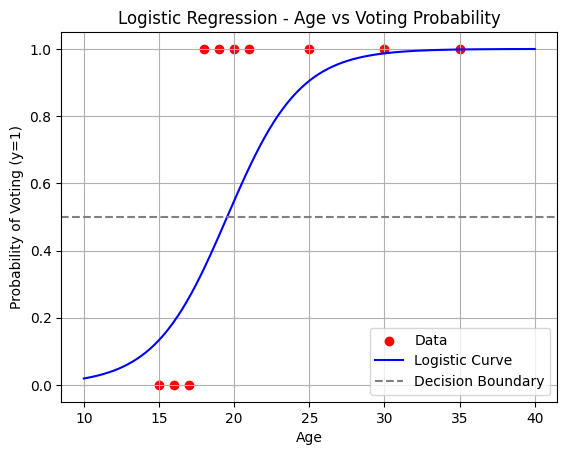

In [ ]:
# Range of ages for smooth curve
X_plot = np.linspace(10, 40, 300)
y_plot = sigmoid(w * X_plot + b)

plt.scatter(X, y, color='red', label='Data')
plt.plot(X_plot, y_plot, color='blue', label='Logistic Curve')
plt.axhline(0.5, linestyle='--', color='gray', label='Decision Boundary')
plt.xlabel("Age")
plt.ylabel("Probability of Voting (y=1)")
plt.title("Logistic Regression - Age vs Voting Probability")
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression using Scikit-Learn

We will now perform logistic regression on training data with multiple features and a binary target, using scikit learn.

Link to the dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Download the dataset and upload it to Colab's files before running the code blocks below.

1. Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

2. Load the dataset and preprocess the data:

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isna().sum() #Checking for null values if any

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
#Create features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
#Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit computes the mean and standard deviation of the training data.
X_test_scaled = scaler.transform(X_test) #transform uses those computed values to scale the training data, ensures your model sees test data on the same scale as it learned during training.

3. Model

In [ ]:
# Initialize Logistic Regression
model = LogisticRegression(random_state=42, solver='liblinear')

# Fit the model
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

4. Metrics

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#f1 score: How confident and complete your model is when predicting the positive class
#Support: Number of true instances of each class in the dataset.

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Model Parameters
print("\nModel Parameters:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"Classes: {model.classes_}")
print(f"Number of Iterations: {model.n_iter_}")


Accuracy Score: 0.7532

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
[[79 20]
 [18 37]]

Model Parameters:
Intercept: [-0.87581424]
Coefficients: [[ 0.21198421  1.0692128  -0.24724324  0.04563169 -0.20074365  0.77544936
   0.23055409  0.41957156]]
Classes: [0 1]
Number of Iterations: [5]
